# TensorFlow常用激活函数及其特点和用法（6种）详解

每个神经元都必须有激活函数。它们为神经元提供了模拟复杂非线性数据集所必需的非线性特性。该函数取所有输入的加权和，进而生成一个输出信号。你可以把它看作输入和输出之间的转换。使用适当的激活函数，可以将输出值限定在一个定义的范围内。

如果 xi 是第 j 个输入，Wj 是连接第 j 个输入到神经元的权重，b 是神经元的偏置，神经元的输出（在生物学术语中，神经元的激活）由激活函数决定，并且在数学上表示如下：
$$Y _ { \mathrm { hat } } = g \left( \sum _ { j = 1 } ^ { N } W _ { j } x _ { j } + b \right)$$
这里，g 表示激活函数。激活函数的参数 ΣWjxj​+b 被称为神经元的活动。

这里对给定输入刺激的反应是由神经元的激活函数决定的。有时回答是二元的（是或不是）。例如，当有人开玩笑的时候...要么不笑。在其他时候，反应似乎是线性的，例如，由于疼痛而哭泣。有时，答复似乎是在一个范围内。

模仿类似的行为，人造神经元使用许多不同的激活函数。在这里，你将学习如何定义和使用 TensorFlow 中的一些常用激活函数。

## 下面认识几种常见的激活函数：

1. 阈值激活函数：这是最简单的激活函数。在这里，如果神经元的激活值大于零，那么神经元就会被激活；否则，它还是处于抑制状态。下面绘制阈值激活函数的图，随着神经元的激活值的改变在 TensorFlow 中实现阈值激活函数：

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()

In [2]:
# tf.shape返回张量的形状
# tf.less返回两个张量各元素比较（x<y）得到的真假值组成的张量
A = [[1, 2, 3]]
t = tf.shape(A)  # 返回张量的形状 t = [1 3]
i = [3, 2]
r = tf.less(i, t)  # 对比 i 与 t对应位置的元素 是否 i 中的比 t 中的小 得到的真假值组成的张量
print(sess.run(t))
print(sess.run(r))

[1 3]
[False  True]


In [9]:
A = [[1, 2, 3], [4, 5, 6]]
t = tf.shape(A)
B = [[1, 2, 1], [1, 2, 3]]
r = tf.less(B, A)
print(sess.run(t))
print(sess.run(r))

[2 3]
[[False False  True]
 [ True  True  True]]


In [10]:
a1 = np.array([1, 0, -2, 2.3, -0.1])
cond = tf.less(a1, tf.zeros(tf.shape(a1), dtype=a1.dtype)) # a1 是否小于 0 
print(sess.run(cond))

[False False  True False  True]


官方文档中只有tf.where(input, name=None)一种用法，在实际应用中发现了另外一种使用方法tf.where(input, a,b)，其中a，b均为尺寸一致的tensor，作用是将a中对应input中true的位置的元素值不变，其余元素进行替换，替换成b中对应位置的元素值，下面使用代码来说明：

In [5]:
a = np.array([[1, 0, 0], [0, 1, 1]])
a1 = np.array([[3, 2, 3], [4, 5, 6]])
a2 = np.array([[4, 5, 6], [7, 5, 9]])

b1 = sess.run(tf.equal(a, 1))
b2 = sess.run(tf.where(
    b1, a1, a2))  # 把 a1 中对应 b1 中为 True 的位置的元素值不变，其他的元素替换成 a2 中对应位置的元素值
print("b1\n", b1)
print("a1\n", a1)
print("a2\n", a2)
print("b2\n", b2)

b1
 [[ True False False]
 [False  True  True]]
a1
 [[3 2 3]
 [4 5 6]]
a2
 [[4 5 6]
 [7 5 9]]
b2
 [[3 5 6]
 [7 5 6]]


[False False  True False  True]


In [12]:
# Threshold Activation function
def threshold(x):
    """小于0返回0，否则返回1"""
    cond = tf.less(x, tf.zeros(tf.shape(x), dtype=x.dtype)) # cond： x 元素小于 0 的地方 为 True 否则 为 False
    out = tf.where(cond, tf.zeros(tf.shape(x)), tf.ones(tf.shape(x))) # out: cond 为True的地方是 0 是False的地方 是 1 
    return out

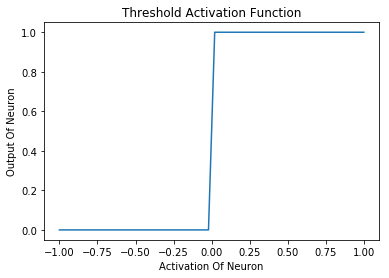

In [14]:
# Plotting Threshold Activation Function
h = np.linspace(-1, 1, 50)
out = threshold(h)
init = tf.global_variables_initializer()

sess.run(init)
y = sess.run(out)
plt.xlabel('Activation Of Neuron')
plt.ylabel('Output Of Neuron')
plt.title('Threshold Activation Function')
plt.plot(h, y)
plt.show()

2. Sigmoid 激活函数：在这种情况下，神经元的输出由函数 g(x)=1/(1+exp(-x)) 确定。在 TensorFlow 中，方法是 tf.sigmoid，它提供了 Sigmoid 激活函数。这个函数的范围在 0 到 1 之间：

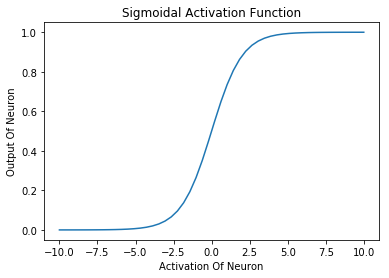

In [15]:
# Plotting Sigmodial Activation Function
h = np.linspace(-10,10,50)
out = tf.sigmoid(h)
init = tf.global_variables_initializer()

sess.run(init)
y = sess.run(out)
plt.xlabel('Activation Of Neuron')
plt.ylabel('Output Of Neuron')
plt.title('Sigmoidal Activation Function')
plt.plot(h, y)
plt.show()

3. 双曲正切激活函数：在数学上，它表示为 (1-exp(-2x)/(1+exp(-2x)))。在形状上，它类似于 Sigmoid 函数，但是它的中心位置是 0，其范围是从 -1 到 1。TensorFlow 有一个内置函数 tf.tanh，用来实现双曲正切激活函数：

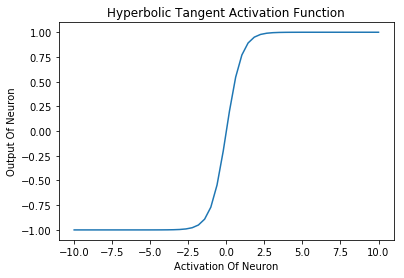

In [16]:
# Plotting Hyperbolic Tangent Activation Function
h = np.linspace(-10,10,50)
out = tf.tanh(h)
init = tf.global_variables_initializer()

sess.run(init)
y = sess.run(out)
plt.xlabel('Activation Of Neuron')
plt.ylabel('Output Of Neuron')
plt.title('Hyperbolic Tangent Activation Function')
plt.plot(h, y)
plt.show()

4. 线性激活函数：在这种情况下，神经元的输出与神经元的输入值相同。这个函数的任何一边都不受限制：

In [37]:
## Linear Activation Function
# b = tf.Variable(tf.random_normal([1, 1], stddev=2))
# w = tf.Variable(tf.random_normal([3, 1], stddev=2))

# linear_out = tf.matmul(X_in, w) + b
# init = tf.global_variables_initializer()

# sess.run(init)
# out = sess.run(out)
# print(out)

5. 整流线性单元（ReLU）激活函数也被内置在 TensorFlow 库中。这个激活函数类似于线性激活函数，但有一个大的改变：对于负的输入值，神经元不会激活（输出为零），对于正的输入值，神经元的输出与输入值相同：

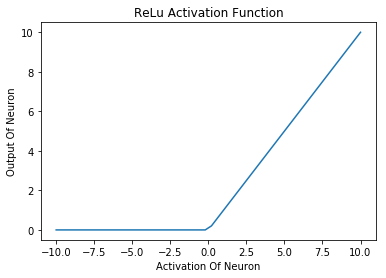

In [38]:
# Plotting ReLu Activation Function
h = np.linspace(-10,10,50)
out = tf.nn.relu(h)
init = tf.global_variables_initializer()

sess.run(init)
y = sess.run(out)
plt.xlabel('Activation Of Neuron')
plt.ylabel('Output Of Neuron')
plt.title('ReLu Activation Function')
plt.plot(h, y)
plt.show()

6. Softmax 激活函数是一个归一化的指数函数。一个神经元的输出不仅取决于其自身的输入值，还取决于该层中存在的所有其他神经元的输入的总和。这样做的一个优点是使得神经元的输出小，因此梯度不会过大。数学表达式为 yi =exp(xi​)/Σjexp(xj)：

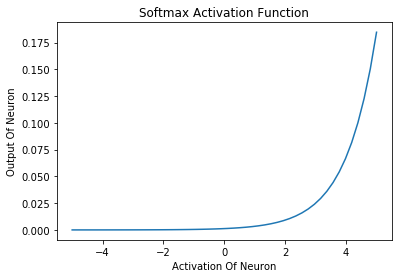

In [42]:
# Plotting Softmax Activation Function
h = np.linspace(-5,5,50)
out = tf.nn.softmax(h)
init = tf.global_variables_initializer()

sess.run(init)
y = sess.run(out)
plt.xlabel('Activation Of Neuron')
plt.ylabel('Output Of Neuron')
plt.title('Softmax Activation Function')
plt.plot(h, y)
plt.show()

下面我们逐个对上述函数进行解释：
- 阈值激活函数用于 McCulloch Pitts 神经元和原始的感知机。这是不可微的，在 x=0 时是不连续的。因此，使用这个激活函数来进行基于梯度下降或其变体的训练是不可能的。
- Sigmoid 激活函数一度很受欢迎，从曲线来看，它像一个连续版的阈值激活函数。它受到梯度消失问题的困扰，即函数的梯度在两个边缘附近变为零。这使得训练和优化变得困难。
- 双曲正切激活函数在形状上也是 S 形并具有非线性特性。该函数以 0 为中心，与 Sigmoid 函数相比具有更陡峭的导数。与 Sigmoid 函数一样，它也受到梯度消失问题的影响。
线性激活函数是线性的。该函数是双边都趋于无穷的 [-inf，inf]。它的线性是主要问题。线性函数之和是线性函数，线性函数的线性函数也是线性函数。因此，使用这个函数，不能表示复杂数据集中存在的非线性。
- ReLU 激活函数是线性激活功能的整流版本，这种整流功能允许其用于多层时捕获非线性。

    使用 ReLU 的主要优点之一是导致稀疏激活。在任何时刻，所有神经元的负的输入值都不会激活神经元。就计算量来说，这使得网络在计算方面更轻便。

    ReLU 神经元存在死亡 ReLU 的问题，也就是说，那些没有激活的神经元的梯度为零，因此将无法进行任何训练，并停留在死亡状态。尽管存在这个问题，但 ReLU 仍是隐藏层最常用的激活函数之一。
- Softmax 激活函数被广泛用作输出层的激活函数，该函数的范围是 [0，1]。在多类分类问题中，它被用来表示一个类的概率。所有单位输出和总是 1。

# 总结

神经网络已被用于各种任务。这些任务可以大致分为两类：函数逼近（回归）和分类。根据手头的任务，一个激活函数可能比另一个更好。一般来说，隐藏层最好使用 ReLU 神经元。对于分类任务，Softmax 通常是更好的选择；对于回归问题，最好使用 Sigmoid 函数或双曲正切函数。